In [ ]:
from google.colab import files
uploaded = files.upload()


Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn (1).csv


In [ ]:
import pandas as pd

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()  # View first few rows


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Check the shape
print("Shape of dataset:", df.shape)

# Check column info
df.info()

# Check if any missing values
df.isnull().sum()


Shape of dataset: (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBill

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.isnull().sum()  # Check again after conversion


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df.dropna(inplace=True)


In [ ]:
df.drop('customerID', axis=1, inplace=True)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode target variable
df['Churn'] = LabelEncoder().fit_transform(df['Churn'])  # Yes=1, No=0

# List of categorical features
cat_cols = df.select_dtypes(include='object').columns

# Use get_dummies for other categorical columns
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

Accuracy: 0.7867803837953091
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.64      0.47      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.79      0.78      1407



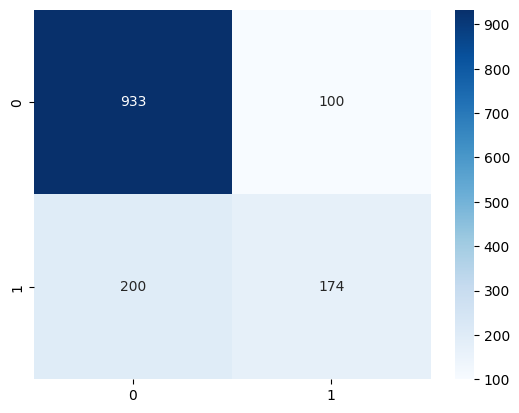

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.show()


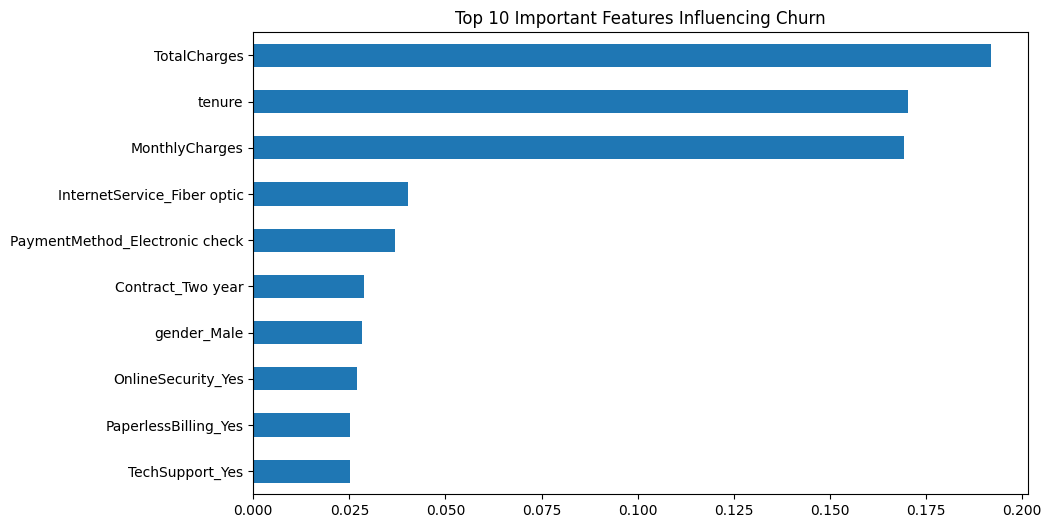

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from the Random Forest model
importances = pd.Series(model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

# Plot top 10 important features
plt.figure(figsize=(10,6))
importances[:10].plot(kind='barh')
plt.title("Top 10 Important Features Influencing Churn")
plt.gca().invert_yaxis()
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_model.predict(X_test)))

# Decision Tree
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
print("Decision Tree Accuracy:", accuracy_score(y_test, tree_model.predict(X_test)))

# Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train, y_train)
print("SVM Accuracy:", accuracy_score(y_test, svm_model.predict(X_test)))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.7874911158493249
Decision Tree Accuracy: 0.7128642501776831
SVM Accuracy: 0.7341862117981521


In [ ]:
import joblib

# Save model
joblib.dump(model, 'customer_churn_model.pkl')

# Later, you can load it like this:
# model = joblib.load('customer_churn_model.pkl')


['customer_churn_model.pkl']

In [ ]:
# Predict for the first customer in test set
sample = X_test.iloc[0:1]
print("Churn Prediction:", model.predict(sample))  # 0 = No churn, 1 = Churn


Churn Prediction: [0]


In [ ]:
sample = X_test.iloc[0:1]
prediction = model.predict(sample)[0]

print("Sample Input:\n", sample)
print("\nChurn Prediction:", "Yes" if prediction == 1 else "No")


Sample Input:
       SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender_Male  \
2481              1      61            25.0       1501.75         True   

      Partner_Yes  Dependents_Yes  PhoneService_Yes  \
2481         True           False              True   

      MultipleLines_No phone service  MultipleLines_Yes  ...  \
2481                           False               True  ...   

      StreamingTV_No internet service  StreamingTV_Yes  \
2481                             True            False   

      StreamingMovies_No internet service  StreamingMovies_Yes  \
2481                                 True                False   

      Contract_One year  Contract_Two year  PaperlessBilling_Yes  \
2481              False               True                 False   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
2481                                  False                           False   

      PaymentMethod_Mailed check  
2481           

In [ ]:
preds = model.predict(X_test[:10])
for i, pred in enumerate(preds):
    print(f"Customer {i+1} Prediction:", "Churn" if pred else "No Churn")


Customer 1 Prediction: No Churn
Customer 2 Prediction: No Churn
Customer 3 Prediction: Churn
Customer 4 Prediction: No Churn
Customer 5 Prediction: No Churn
Customer 6 Prediction: Churn
Customer 7 Prediction: No Churn
Customer 8 Prediction: Churn
Customer 9 Prediction: No Churn
Customer 10 Prediction: No Churn


In [ ]:
results = X_test.copy()
results['Actual Churn'] = y_test
results['Predicted Churn'] = model.predict(X_test)
results['Predicted Churn'] = results['Predicted Churn'].map({0: 'No', 1: 'Yes'})

results.to_csv('churn_prediction_results.csv', index=False)
